Explore the Stanford Open Policing Project dataset and analyze the impact of gender on police behavior after cleaning messy data, creating visualizations, combining and reshaping datasets, and manipulating time series data. 

# Preparing the data

In [ ]:
import pandas as pd


In [ ]:
ri=pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [ ]:
# explore shape of dataset
print(f"We have {ri.shape[0]} instant and {ri.shape[1]} features")

We have 91741 instant and 15 features


In [ ]:
# Count the number of missing values in each column
print(ri.isnull().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


drop the county_name column because it only contains missing values, and you'll drop the state column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information. 

In [ ]:
# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(f"We have {ri.shape[0]} instant and {ri.shape[1]} features after dropping country name and state")

We have 91741 instant and 13 features after dropping country name and state


When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

The driver_gender column will be critical to many of your analyses. Because only a small fraction of rows are missing driver_gender, we'll drop those rows from the dataset.

In [ ]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum(),'\n')

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64 

(86536, 13)


We dropped around 5,000 rows, which is a small fraction of the dataset, and now only one column remains with any missing values.


# Fixing a data type


In [ ]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

"is_arrested" column currently has the object data type. We'll change the data type to bool, which is the most suitable type for a column containing True and False values.

In [ ]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
bool


Combining object columns

Currently, the date and time of each traffic stop are stored in separate object columns: stop_date and stop_time.

We'll combine these two columns into a single column, and then convert it to datetime format. This will enable convenient date-based attributes that we'll use late

In [ ]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


Setting the index

The last step that is to set the stop_datetime column as the DataFrame's index. By replacing the default index with a DatetimeIndex, you'll make it easier to analyze the dataset by date and time.

In [ ]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


Examining traffic violations

Before comparing the violations being committed by each gender, we should examine the violations committed by all drivers to get a baseline understanding of the data

In [ ]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print("\nproportion of violations")
print(ri.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

proportion of violations
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In [ ]:
# Create a DataFrame of female drivers
female = ri[ri['driver_gender']=='F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender']=='M']

# Compute the violations by female drivers (as proportions)
print("Female violations proportion \n",female.violation.value_counts(normalize=True),'\n')

# Compute the violations by male drivers (as proportions)
print("Male violations proportion \n",male.violation.value_counts(normalize=True))

Female violations proportion 
 Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64 

Male violations proportion 
 Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, you'll use the stop_outcome column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

In [ ]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri['driver_gender']=='F') & (ri['violation']=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri['driver_gender']=='M') & (ri['violation']=='Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print("stop outcomes for female drivers \n",female_and_speeding.stop_outcome.value_counts(normalize=True),'\n')

# Compute the stop outcomes for male drivers (as proportions)
print("stop outcomes for male drivers \n",male_and_speeding.stop_outcome.value_counts(normalize=True),'\n')

stop outcomes for female drivers 
 Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64 

stop outcomes for male drivers 
 Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64 



Interesting! The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

Comparing search rates by gender

During a traffic stop, the police officer sometimes conducts a search of the vehicle. We'll calculate the percentage of all stops in the ri DataFrame that result in a vehicle search, also known as the search rate.
Then, we'll compare the rates at which female and male drivers are searched during a traffic stop. 

In [ ]:
# Check the data type of 'search_conducted' to show it's boolean so the value counts and mean will work for the True 
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

# Calculate the search rate for female drivers
print("\nSearch rate for female drivers \n",ri[ri.driver_gender=='F'].search_conducted.mean(),'\n')

# Calculate the search rate for male drivers
print("Search rate for female drivers \n",ri[ri.driver_gender=='M'].search_conducted.mean(),'\n')

#OR
# Calculate the search rate for both groups simultaneously
print("Using Groupby \n", ri.groupby('driver_gender').search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627

Search rate for female drivers 
 0.019180617481282074 

Search rate for female drivers 
 0.04542557598546892 

Using Groupby 
 driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


Wow! Male drivers are searched more than twice as often as female drivers. Why might this be?

Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Let's find out if that's the case!

In [ ]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

Counting protective frisks

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

We'll first check to see how many times "Protective Frisk" was the only search type. Then, we'll use a string method to locate all instances in which the driver was frisked.

In [ ]:
# Count the 'search_type' values
print("Count the 'search_type' values\n",ri.search_type.value_counts(),'\n')

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print("data type of 'frisk'",ri.frisk.dtype,'\n')

# Take the sum of 'frisk'
print("nb of times frisk was presented", ri.frisk.sum())

Count the 'search_type' values
 Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk        

 It looks like there were 303 drivers who were frisked. Next, you'll examine whether gender affects who is frisked.

Comparing frisk rates by gender

we'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

In [ ]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print("overall frisk rate by taking the mean of 'frisk'",searched.frisk.mean(),'\n')

# Calculate the frisk rate for each gender
print("frisk rate for each gender",searched.groupby('driver_gender').frisk.mean())

overall frisk rate by taking the mean of 'frisk' 0.09162382824312065 

frisk rate for each gender driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


Interesting! The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

# Visual EDA

Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate.we'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the ri DataFrame. Then, you'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

0 = midnight
12 = noon
23 = 11 PM

In [ ]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


Plotting the hourly arrest rate

we'll create a line plot from the hourly_arrest_rate object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

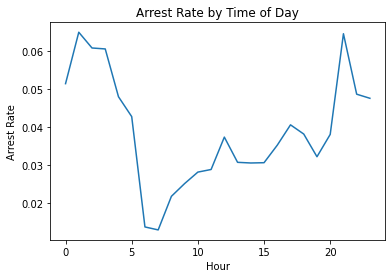

In [ ]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
plt.plot(hourly_arrest_rate)

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

Wow! The arrest rate has a significant spike overnight, and then dips in the early morning hours.

Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column drugs_related_stop indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


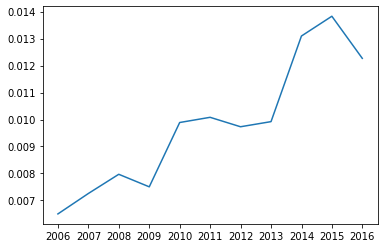

In [ ]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
plt.plot(annual_drug_rate)

# Display the plot
plt.show()


Interesting! The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

Comparing drug and search rates

from the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

               drugs_related_stop  search_conducted
stop_datetime                                      
2005-12-31               0.006501          0.049167
2006-12-31               0.007258          0.041758
2007-12-31               0.007970          0.044056
2008-12-31               0.007505          0.040310
2009-12-31               0.009889          0.049861


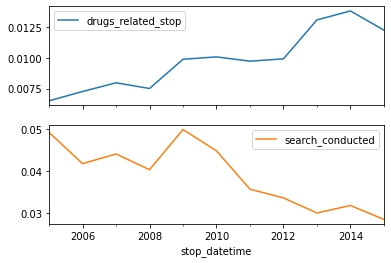

In [ ]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')
print(annual.head())
# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

Plotting violations by district

Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a bar plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

In [ ]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1' : 'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1' : 'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

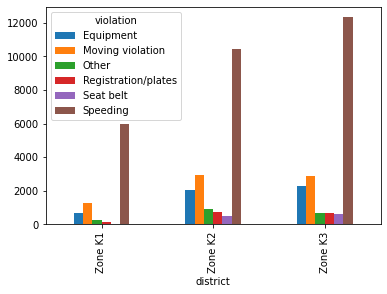

In [ ]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

Interesting! The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

Converting stop durations to numbers

In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

We'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

Convert '0-15 Min' to 8
Convert '16-30 Min' to 23
Convert '30+ Min' to 45

In [ ]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min': 23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


Next you'll analyze the stop length for each type of violation.


Plotting stop length

If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, you'll use violation_raw since it contains more detailed descriptions of the violations.

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


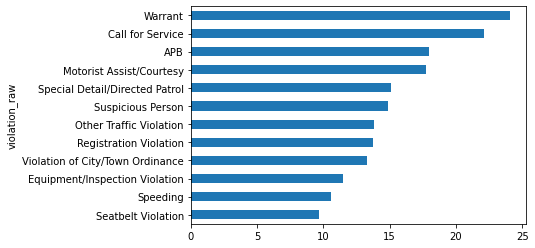

In [ ]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()